### On the Responsible use of Pseudo-Random Number Generators in Scientific Research

#### Notebook by: [crahal](https://github.com/crahal/).

#### Last modified: 1.04.2024

#### Section 0

Lets first load in some dependancies. Note, all the plotting functions can be found in `./src/helper_figure_plotters.py`. The data lives as outputs from other scripts in `./src`, and invariably pulls in results from `./data/`. Figures get _output_ to `figure_path`, defined below. As always, we rely heavily on `pandas`.

In [1]:
import os
import json
import zipfile
import warnings
import pandas as pd
from helper_figure_plotters import load_sympt,\
                                   plot_three_predictions,\
                                   plot_mvprobit,\
                                   plot_four_simple_examples,\
                                   plot_collisions,\
                                   plot_topics_barplot,\
                                   plot_ffc, plot_three_rws,\
                                   plot_further_examples

warnings.filterwarnings("ignore")
figure_path = os.path.join(os.getcwd(), '..', 'figures')

In [2]:
file_path_100 = os.path.join(os.getcwd(),
                             '..',
                             'data',
                             'rnom',
                             'rnom_samples100_seeds100000_results'
                            )
with zipfile.ZipFile(file_path_100 + '.zip', 'r') as zip_ref:
    file_names = zip_ref.namelist()
    print("Files in the zip:", file_names)  # Print to check the correct file name
    json_file_name = file_names[0]  # Adjust the index if necessary
    with zip_ref.open(json_file_name) as file:
        data_dict_100 = json.load(file)

print(f"The minimum mean value is: {data_dict_100['min_val']}")
print(f"The maximum mean value is: {data_dict_100['max_val']}")

Files in the zip: ['rnom_samples100_seeds100000_results.json']
The minimum mean value is: -0.4317892661417437
The maximum mean value is: 0.415586882007415


#### Section 1

Lets plot the results from four simple simulation examples, which are grouped together into what is probably 'Figure 1' in the accompanying academic paper. The four examples are:

* 'a.': The number of "Infected" people in a Susceptible, Infected, Recovered (SIR) model.
* 'b.': Replicating buffon's needle experiment with different seeds.
* 'c.': Estimating the number of collisions within a 32-bit Mersenne Twister implementation.
    - This is loosely based on work of Hofert (2020, The American Statisician), available [here](https://arxiv.org/abs/2003.08009v2).
* 'd.': A stochastic Solow growth model.

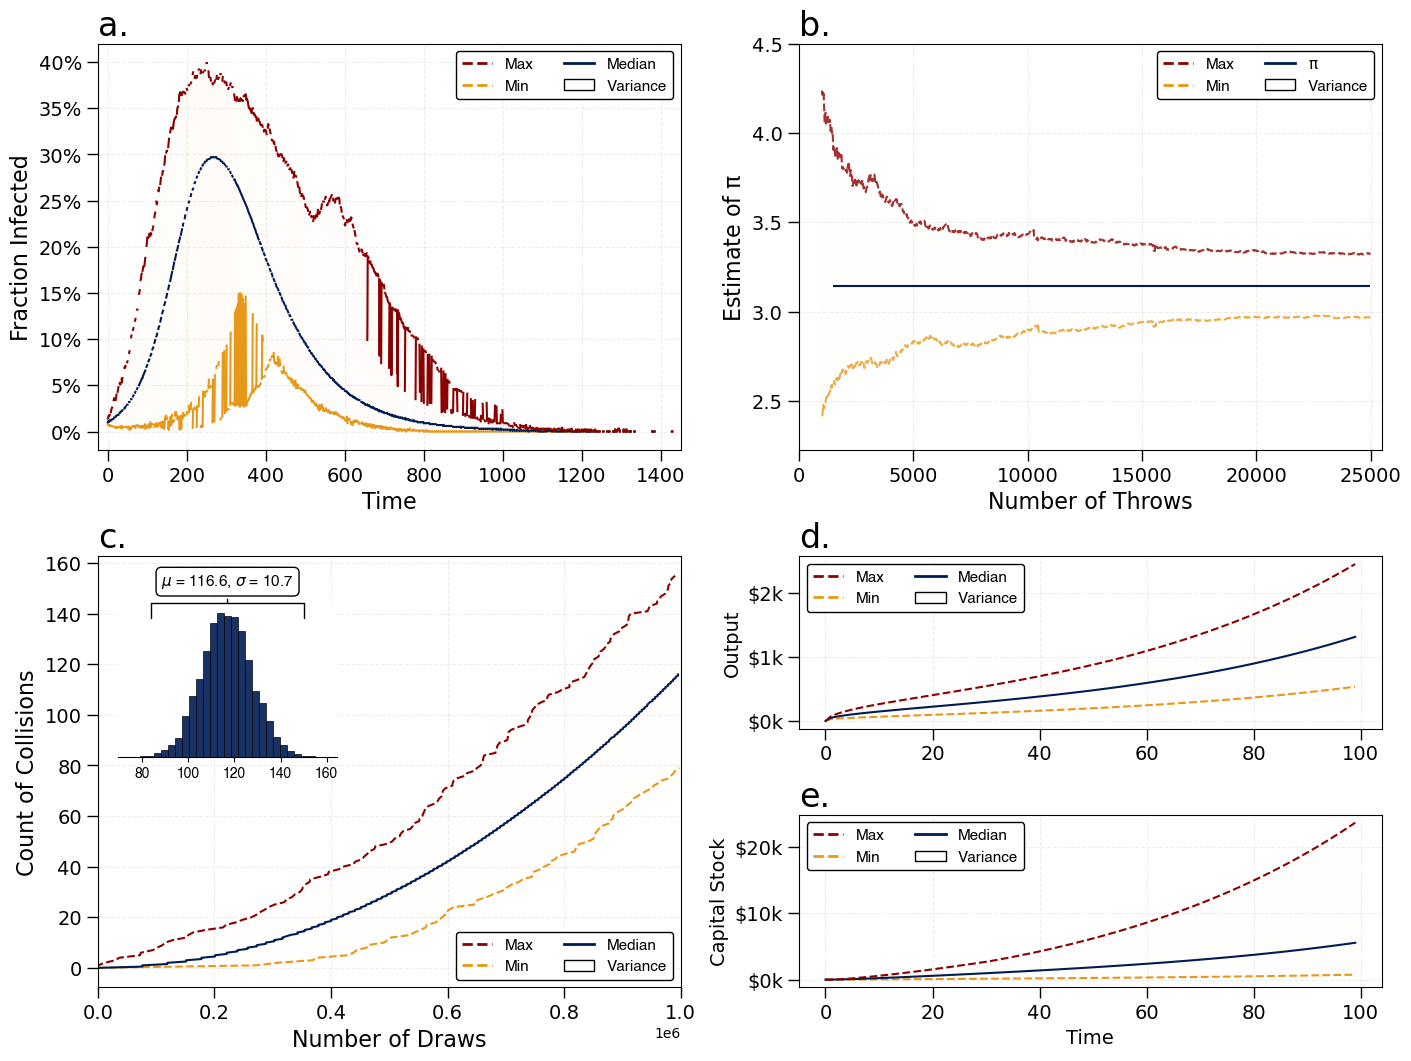

In [3]:
plot_four_simple_examples(figure_path)

#### Section 2

Lets now move on from these simple simulations to consider some more elaborate replications, all of different shapes and sizes. First, lets load in the predictions generated on the [SAIL](https://saildatabank.com/) VM with the symptomtracker data. It loosely repicates Menni et al. (2020, Nature Medicine), available [here](https://www.nature.com/articles/s41591-020-0916-2).

In [4]:
filename = 'roc_auc_full_firstwave_5folds_10kseeds_stratified.csv'
first_wave_10k_stratified_list = load_sympt(filename)

Then, lets use this data, and plot it along side two other types of predictions:
    
* A simple, more teaching-orientated example (predicting house prices)
* Computer Vision example with a convolutional neural network (recognising MNIST).

Covid min:  0.6706358899202085
Covid max:  0.8123153511526741
Covid mean:  0.7430775679453714
Housing min:  0.6286547695616572
Housing max:  0.67789250745027
Housing mean:  0.6552080622975259
MNIST min:  9001
MNIST max:  9728
MNIST mean:  9623.3025


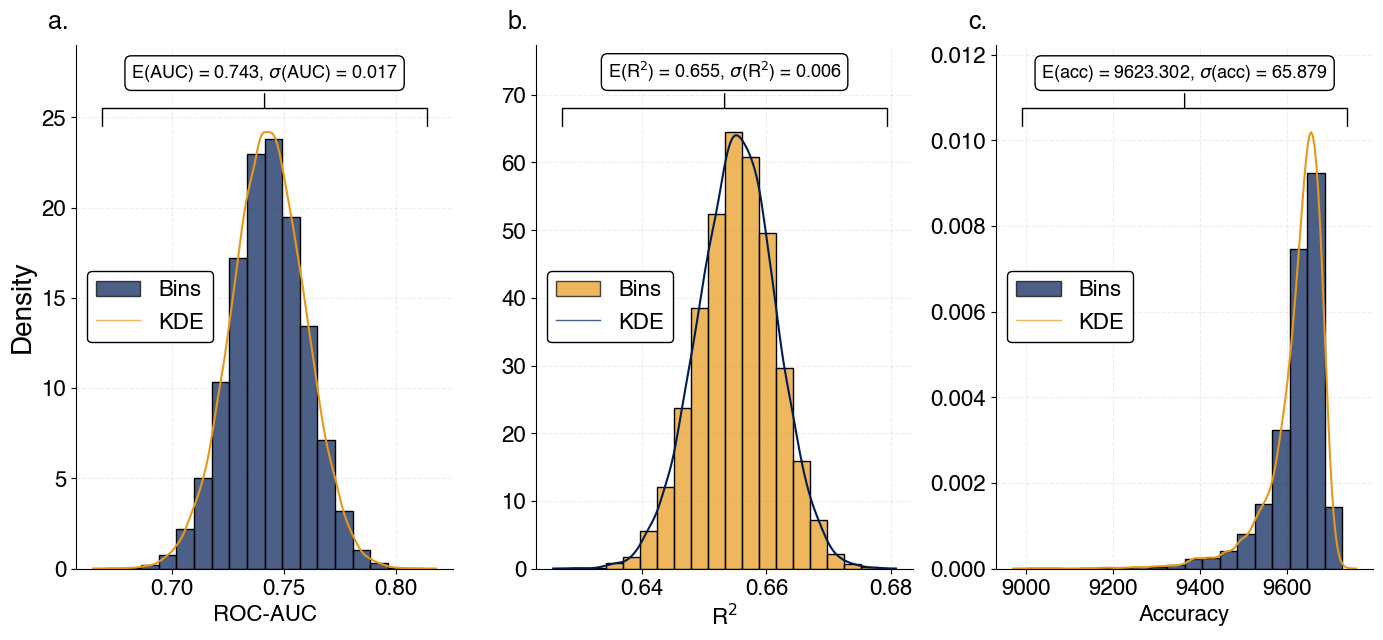

In [5]:
plot_three_predictions(first_wave_10k_stratified_list, figure_path)

Now lets move on to a more familiar statistical\econometric example. This is based on the `mvprobit` Stata package of Cappellari and Jenkins (2003, The Stata Journal), available [here](https://journals.sagepub.com/doi/pdf/10.1177/1536867X0300300305).

Min value of $\rho_{21}$ at 2 draws: -0.53390896
Max value of $\rho_{21}$ at 2 draws: 0.25147465
Min value of $\rho_{21}$ at 150 draws: -0.35242346
Max value of $\rho_{21}$ at 150 draws: -0.18469827


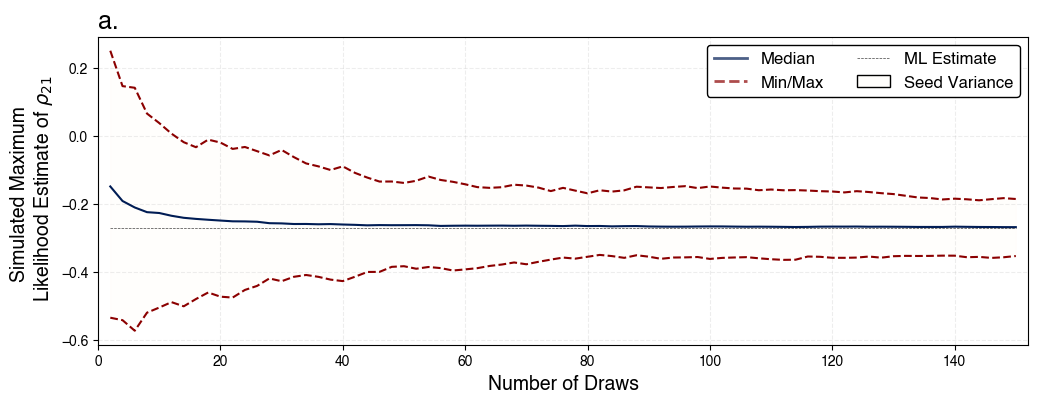

In [6]:
plot_mvprobit(figure_path)

We next assess the effect of seeds on the instrumental Fragile Families Challenge of Salganik et al. (2020, PNAS), available [here](https://www.pnas.org/doi/10.1073/pnas.1915006117). Here, the seed variability stems from the [Amelia](https://cran.r-project.org/web/packages/Amelia/index.html) package. Note that to replicate this work, you'll need to download the FFC replication materials from the Harvard dataverse (available [here](https://dataverse.harvard.edu/dataset.xhtml;jsessionid=cafb079a3ebb9e708c193e78ac20?persistentId=doi%3A10.7910%2FDVN%2FCXSECU&version=&q=&fileTypeGroupFacet=%22Image%22&fileAccess=)).

gpa. Min beta :0.1193. Max beta: 0.2435. Min R2: 0.0558. Max R2: 0.1498
grit. Min beta :-0.0104. Max beta: 0.0747. Min R2: 0.0023. Max R2: 0.0228
materialHardship. Min beta :0.3538. Max beta: 0.3779. Min R2: 0.1657. Max R2: 0.1892
eviction. Min beta :1.5946. Max beta: 1.9301. Min R2: 0.0098. Max R2: 0.0209
jobTraining. Min beta :0.601. Max beta: 0.8201. Min R2: 0.0443. Max R2: 0.0559
layoff. Min beta :0.2313. Max beta: 0.4929. Min R2: 0.0032. Max R2: 0.0117


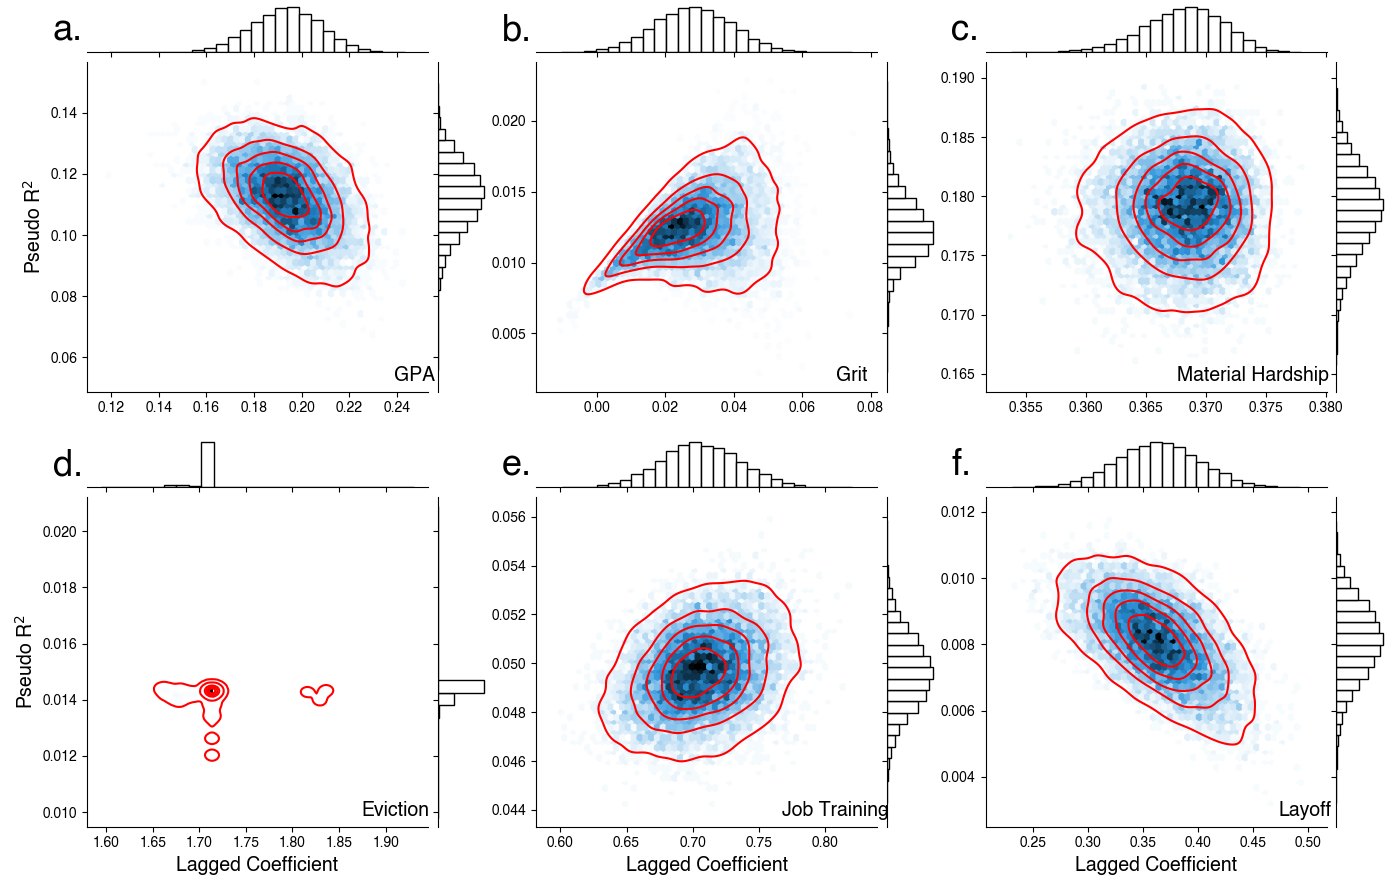

In [7]:
warnings.filterwarnings("ignore")
figure_path = os.path.join(os.getcwd(), '..', 'figures')

ffc = pd.read_csv(os.path.join(os.getcwd(), '..', 'data', 'ffc',
                               'output', 'seed',
                               'seed_analysis_10000.csv')
                 )
plot_ffc(ffc, figure_path)

Plot the result of our random walk script:

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


The minimum BTC RW forecast is: 23895.987633474004
The maximum BTC RW forecast is: 297047.1991366344
The median BTC RW forecast is: 83841.08947778266
The minimum NASDAQ RW forecast is: 10384.968521242734
The maximum NASDAQ RW forecast is: 38119.69793848109
The median NASDAQRW forecast is: 20111.972337848732
The minimum NVIDIA RW forecast is: 90.62973571681913
The maximum NVIDIA RW forecast is: 1318.4583263947718
The median NVIDIA RW forecast is: 348.73038921955276


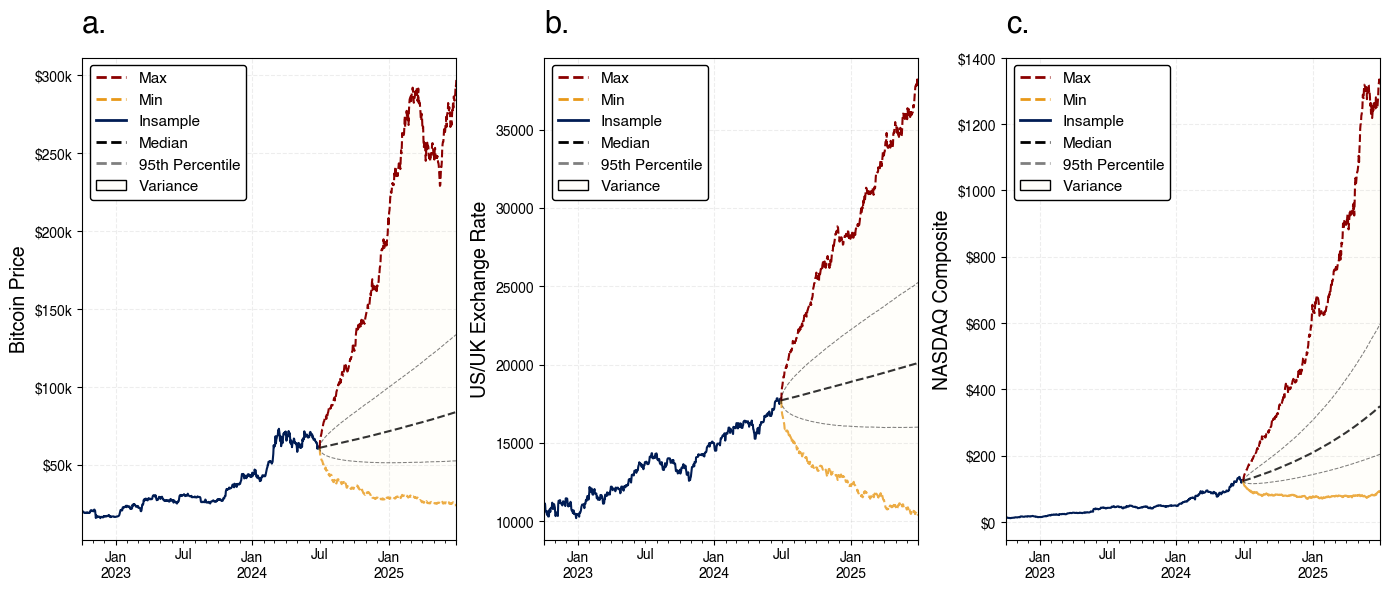

In [8]:
plot_three_rws()

[*********************100%%**********************]  1 of 1 completed


The minimum USUK RW forecast is: 0.6344813157389798
The maximum USUK RW forecast is: 1.0718573382939551
The median RW forecast is: 0.8284735406215726
15.0 42.0


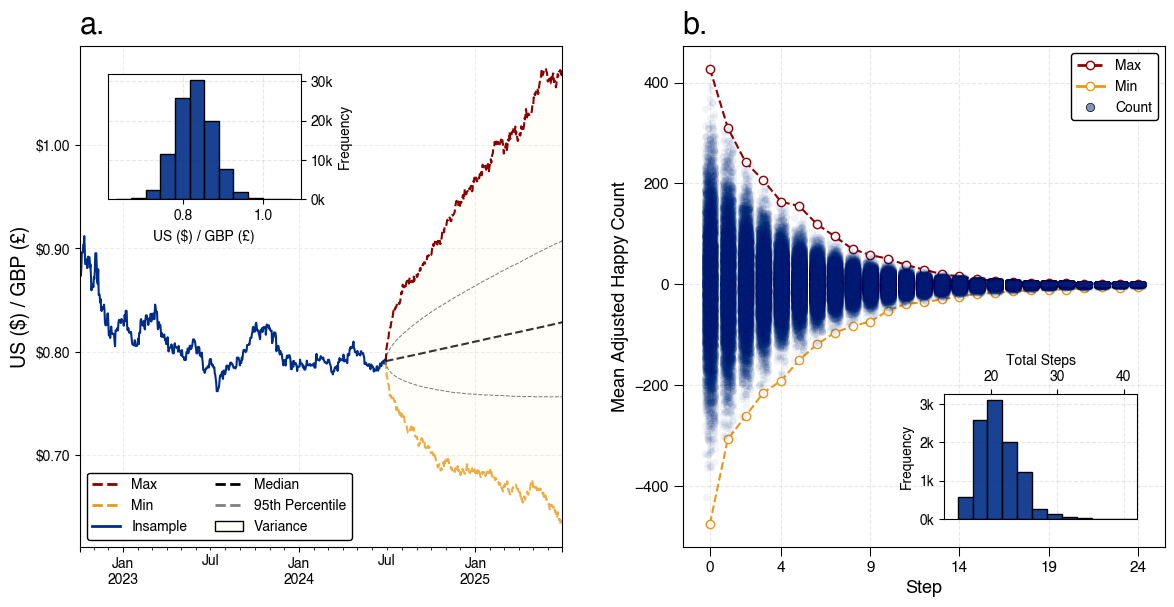

In [9]:
plot_further_examples()

Finally, we utilise the immensely popular BERTopic algorithm by of Grootendorst (2022), available here [here](https://arxiv.org/pdf/2203.05794.pdf). In these examples, we use four sets of abstracts obtained from [dimensions.ai](https://www.dimensions.ai/). The abstracts which are thusly topic modelled are from the journals:
    
    * Science
    * The New England Journal of Medicine
    * PNAS
    * Nature

In [10]:
plot_topics_barplot(figure_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/porco/Dropbox/seeds/src/../data/bibliometric/meta_data/metadata_science.csv'

#### Section 3

Scientometric Analysis

In [ ]:
import os
import warnings
import pandas as pd
from helper_figure_plotters import load_scientometrics,\
                                   desc_print_scientometrics,\
                                   make_table,\
                                   make_scientometric_ts

In [ ]:
df_rng, df_hrng, df_qrng, df_prng, df_quarng, df_yr, df_yr_dom, df_dom = load_scientometrics()

In [ ]:
desc_print_scientometrics(df_rng, df_hrng, df_qrng, df_prng, df_quarng)

In [ ]:
make_table(df_rng, df_hrng, df_qrng, df_prng, df_quarng, 'field')

In [ ]:
df_dom.loc[0, 'domain'] = 'Life Sciences'
df_dom.loc[1, 'domain'] = 'Social Sciences'
df_dom.loc[2, 'domain'] = 'Physical Sciences'
df_dom.loc[3, 'domain'] = 'Health Sciences'
df_dom = df_dom.set_index('domain')

In [ ]:
domain_df = make_table(df_rng, df_hrng, df_qrng, df_prng, df_quarng, 'domain')
domain_df = domain_df.div(df_dom['count'], axis=0)*100
domain_df.to_csv('../figures/domain_table.csv')
domain_df


In [ ]:
df_yr = make_scientometric_ts(df_rng, df_hrng, df_qrng, df_prng, df_yr, domain_df)

In [ ]:
df_yr

In [ ]:
df_yr = df_yr.set_index('year')
for rng_type in ['RNG_count', 'HRNG_count', 'QRNG_count', 'PRNG_count']:
    print('The percent of OpenAlex which is focused on ' + rng_type.split('_')[0] +
          ' in year 1970 is ' + str(df_yr.loc[1970, rng_type].round(4)))
    print('The percent of OpenAlex which is focused on ' + rng_type.split('_')[0] +
          ' in year 2020 is ' + str(df_yr.loc[2020, rng_type].round(4)))

#### Section 4

That is not to say that these are all of the times when random states can have dramatic effects on estimand outputs. Indeed, the set of _types_ where the effects are huge are far greater than the sparse number of examples which we show as part of this project. This is just a compactly presented set which makes dissemination of our message easiest!

Please don't hesitate to get in contact with any other examples which you can think of, or raise bugs if you find any issues!